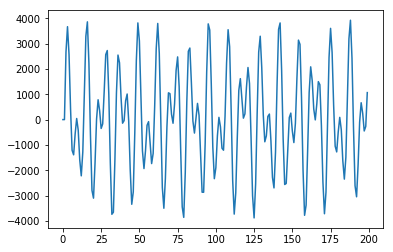

In [140]:
#Testing tone filters
import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile

fsamp = 8000
f = 697
f2 = 1209
omega = (2*np.pi*f/fsamp)
omega2 = ((2*np.pi*f2/fsamp))
lim = 20000

x = [0]*lim
x[1] = 1

out = [0]*lim
out2 = [0]*lim
n = 0
while n < lim:
    if(n-1 >= 0):
        out[n] = 2*np.cos(omega)*out[n-1]+np.sin(omega)*x[n-1]
        out2[n] = 2*np.cos(omega2)*out2[n-1]+np.sin(omega2)*x[n-1]
    if(n-2 >= 0):
        out[n]-= out[n-2]
        out2[n]-= out2[n-2]
    n +=1
amp =2000

#merge wave
wave = [0.0]*lim
i = 0 
while i < lim:
    wave[i]= (out[i]+out2[i])*amp
    i+=1
plt.plot(wave[:200])
plt.show()

In [141]:
ywave = np.asarray(wave,dtype=np.int16)
wavfile.write("C.wav",fsamp,ywave)
IPython.display.Audio("C.wav")

In [155]:
#1.a)playing dialtones
def dail(num):
    if (num == 1):
        f = 697
        f2 = 1209
    if (num == 2):
        f = 697
        f2 = 1336
    if (num == 3):
        f = 697
        f2 = 1477
    if (num == 4):
        f = 770
        f2 = 1209
    if (num == 5):
        f = 770
        f2 = 1336
    if (num == 6):
        f = 770
        f2 = 1477
    if (num == 7):
        f = 852
        f2 = 1209
    if (num == 8):
        f = 852
        f2 = 1336
    if (num == 9):
        f = 852
        f2 = 1477
    if (num == 11):
        f = 941
        f2 = 1209
    if (num == 0):
        f = 941
        f2 = 1336
    if (num == 12):
        f = 941
        f2 = 1477
        
    fsamp = 8000
    omega = (2*np.pi*f/fsamp)
    omega2 = (2*np.pi*f2/fsamp)
    lim = 2000
    
    
    x = [0]*lim
    x[1] = 1

    out = [0]*lim
    out2 = [0]*lim
    n = 0
    while n < lim:
        if(n-1 >= 0):
            out[n] = 2*np.cos(omega)*out[n-1]+np.sin(omega)*x[n-1]
            out2[n] = 2*np.cos(omega2)*out2[n-1]+np.sin(omega2)*x[n-1]
        if(n-2>=0):
            out[n] = 2*np.cos(omega)*out[n-1]+np.sin(omega)*x[n-1]-out[n-2]
            out2[n] = 2*np.cos(omega2)*out2[n-1]+np.sin(omega2)*x[n-1]-out2[n-2]

        n +=1
    amp =10000

    #merge wave
    wave = [0.0]*lim
    i = 0 
    while i < lim:
        wave[i]= (out[i]+out2[i])*amp
        i+=1
    return wave

In [165]:
#b) dail 600-599-2000
dwave6 = dail(6) 
dwave0 = dail(0)
dwave5 = dail(5)
dwave9 = dail(9)
dwave2 = dail(2)
# other waves 
dwave1 = dail(1)
dwave3 = dail(3)
dwave4 = dail(4)
dwave7 = dail(7)
dwave9 = dail(9)

mergewave = [*dwave6,*dwave0,*dwave0,*dwave5,*dwave9,*dwave9,*dwave2,*dwave0,*dwave0,*dwave0]

Mwave = np.asarray(mergewave,dtype=np.int16)
wavfile.write("phone.wav",fsamp,Mwave)

In [157]:
IPython.display.Audio("phone.wav")
#works

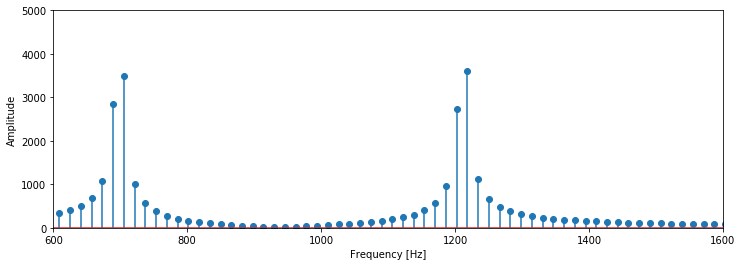

In [176]:
#testing FFT 500 samples seems fine and quickly
fft = np.fft.fft(dwave1[:500]) #xsamp is your stem plot data
N = len(dwave1[:500])
f = np.linspace(0, 8000, N) 
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.axis([600,1600,0,5000])
plt.stem(f,np.abs(fft)/N)
plt.show()

In [177]:
#band filters from last lab
def band_pass(signal,f,bw):
    r=1-3*bw
    k=(1-2*r*np.cos(2*np.pi*f)+r**2)/(2-2*np.cos(2*np.pi*f))
    #out
    out = [0.0]*len(signal)
    #the a
    a0 =1-k
    a1=2*(k-r)*np.cos(2*np.pi*f)
    a2 =r**2 - k
    # the bs
    b1 = 2*r*np.cos(2*np.pi*f)
    b2 = -1*r**2
    #apply filter
    n = 0
    while n < len(signal):
        out[n]= a0*signal[n]
        if(n-1 >= 0):
            out[n] = out[n] + a1*signal[n-1] + b1*out[n-1]
        if(n-2>0):
            out[n] = out[n] + a2*signal[n-2] + b2*out[n-2]
        n+=1
    return out

In [216]:
#testing filter
fc = 697/8000
bw =20/8000
F1 = band_pass(dwave2,fc,bw)

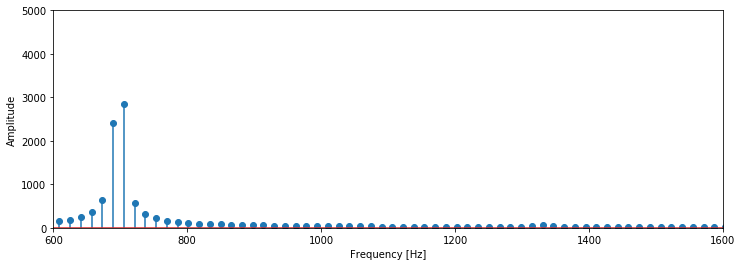

row1


In [217]:
#filter results
fft = np.fft.fft(F1[:500]) #xsamp is your stem plot data
N = len(F1[:500])
f = np.linspace(0, 8000, N) 
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.axis([600,1600,0,5000])
plt.stem(f,np.abs(fft)/N)
plt.show()
#testing find function
FT=np.abs(fft)/N
result = any(y >= 2000 for y in FT)
if result:print("row1")
    

In [226]:
#dial tone finder
def find_tone(wave):
    bw = 20/8000 #same for all filters
    #using ints to find numbers
    row = 7 #defalt values
    col = 7
    # frequecy needed for rows
    f697 = 697/8000
    f770 = 770/8000
    f852 = 852/8000
    f941 = 941/8000
    #cols
    f1209 = 1209/8000
    f1336 = 1336/8000
    f1477 = 1477/8000
    #filters
    R1 = band_pass(wave,f697,bw)
    R2 = band_pass(wave,f770,bw)
    R3 = band_pass(wave,f852,bw)
    R4 = band_pass(wave,f941,bw)
    C1 = band_pass(wave,f1209,bw)
    C2 = band_pass(wave,f1336,bw)
    C3 = band_pass(wave,f1477,bw)
    #FFT of filters
    N = len(R1[:500])
    
    FR1 = np.fft.fft(R1[:500])
    FR1T=np.abs(FR1)/N
    
    FR2 = np.fft.fft(R2[:500])
    FR2T=np.abs(FR2)/N
    
    FR3 = np.fft.fft(R3[:500])
    FR3T=np.abs(FR3)/N
    
    FR4 = np.fft.fft(R4[:500])
    FR4T=np.abs(FR4)/N
    
    FC1 = np.fft.fft(C1[:500])
    FC1T=np.abs(FC1)/N
    
    FC2 = np.fft.fft(C2[:500])
    FC2T=np.abs(FC2)/N
    
    FC3 = np.fft.fft(C3[:500])
    FC3T=np.abs(FC3)/N
    #checking values
    result = any(y >= 2000 for y in FR1T)
    if result:row = 1
    
    result = any(y >= 2000 for y in FR2T)
    if result:row = 2
        
    result = any(y >= 2000 for y in FR3T)
    if result:row = 3
    
    result = any(y >= 2000 for y in FR4T)
    if result:row = 4
    
    result = any(y >= 2000 for y in FC1T)
    if result:col = 1
    
    result = any(y >= 2000 for y in FC2T)
    if result:col = 2
        
    result = any(y >= 2000 for y in FC3T)
    if result:col = 3
    #spitting out answers
    if(row == 1 and col == 1):print("wave '1'")
    if(row == 1 and col == 2):print("wave '2'")
    if(row == 1 and col == 3):print("wave '3'")
    
    if(row == 2 and col == 1):print("wave '4'")
    if(row == 2 and col == 2):print("wave '5'")
    if(row == 2 and col == 3):print("wave '6'")
        
    if(row == 3 and col == 1):print("wave '7'")
    if(row == 3 and col == 2):print("wave '8'")
    if(row == 3 and col == 3):print("wave '9'")
        
    if(row == 4 and col == 1):print("wave '*'")
    if(row == 4 and col == 2):print("wave '0'")
    if(row == 4 and col == 3):print("wave '#'")
        
    if(row == 7 or col == 7):print("unkown")
    return

In [228]:
find_tone(dwave9)
find_tone(dwave7)
find_tone(dwave2)
#seems to work fine

wave '9'
wave '7'
wave '2'
